In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
df=pd.read_csv("D:\Symbiosis\Polynomial Regression\housing.csv")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


In [2]:
df.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


In [3]:
x=df[["RM","LSTAT","PTRATIO"]]  # -->independent
y=df["MEDV"]

In [4]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
# step 3
model=LinearRegression()
model.fit(xtrain,ytrain)
# step 4
ypred=model.predict(xtest)
data=pd.DataFrame({"Actual":ytest,"Predicted":ypred})
print(data)
print("R square:",model.score(xtrain,ytrain))
print("y intercept",model.intercept_)
print("slope",model.coef_)

      Actual      Predicted
256   478800  540493.855583
381   105000  151405.384381
396   342300  255778.466437
225  1014300  726805.080574
212   483000  532452.287089
..       ...            ...
253  1024800  799854.867690
286   426300  434161.887469
340   506100  570371.173518
455   487200  416890.619054
190   699300  749316.597159

[98 rows x 2 columns]
R square: 0.710095376872138
y intercept 517068.6246947335
slope [ 72226.06725111 -11978.72979037 -19459.53667064]


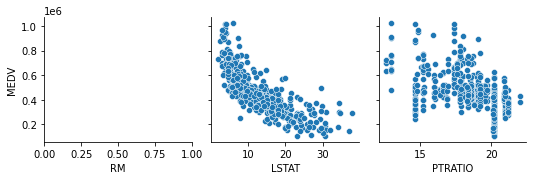

In [5]:
import seaborn as sns
sns.pairplot(data=df,x_vars=["RM","LSTAT","PTRATIO"],y_vars=["MEDV"])

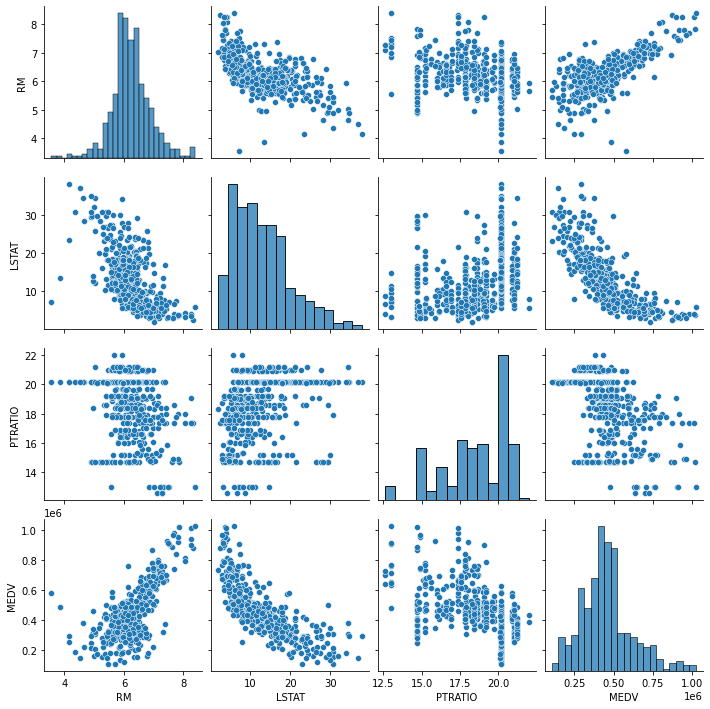

In [6]:
sns.pairplot(df)

In [7]:
from sklearn.linear_model import Ridge
Ridge_model=Ridge(alpha=0.3)
Ridge_model.fit(x,y)
print(Ridge_model.score(x,y))
print(Ridge_model.coef_)

0.7176271275194632
[ 86360.3923768  -10860.26635456 -19495.23627387]


In [8]:
from sklearn.linear_model import Lasso
Lasso_model=Lasso(alpha=0.1)
Lasso_model.fit(x,y)
print(Lasso_model.score(x,y))
print(Lasso_model.coef_)

0.7176275212979419
[ 86565.0768999  -10849.3515063  -19492.09449164]


In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_trans=PolynomialFeatures(degree=3)
#transform x to polynomial feature with degree is 3
x_poly=poly_trans.fit_transform(x)

In [10]:
x_poly

array([[1.00000000e+00, 6.57500000e+00, 4.98000000e+00, ...,
        3.79446120e+02, 1.16576820e+03, 3.58157700e+03],
       [1.00000000e+00, 6.42100000e+00, 9.14000000e+00, ...,
        1.48700488e+03, 2.89591760e+03, 5.63975200e+03],
       [1.00000000e+00, 7.18500000e+00, 4.03000000e+00, ...,
        2.89088020e+02, 1.27686520e+03, 5.63975200e+03],
       ...,
       [1.00000000e+00, 6.97600000e+00, 5.64000000e+00, ...,
        6.68001600e+02, 2.48724000e+03, 9.26100000e+03],
       [1.00000000e+00, 6.79400000e+00, 6.48000000e+00, ...,
        8.81798400e+02, 2.85768000e+03, 9.26100000e+03],
       [1.00000000e+00, 6.03000000e+00, 7.88000000e+00, ...,
        1.30398240e+03, 3.47508000e+03, 9.26100000e+03]])

In [11]:
poly_model=LinearRegression()
poly_model.fit(x_poly,y)

LinearRegression()

In [12]:
ypred=poly_model.predict(x_poly)

In [13]:
pd.DataFrame({"Actual":y,"Predicted":ypred})

,Actual,Predicted
0,504000,590461.638300
1,453600,516259.540694
2,728700,710628.229572
3,701400,662594.671920
4,760200,663087.030269
...,...,...
484,470400,466051.439481
485,432600,434364.992780
486,501900,573776.564197
487,462000,536749.500955


In [14]:
poly_model.score(x_poly,y)

0.846246220238685